This notebook contains the code to use the Convolutional Neural Network architecture introduced in LeCun's paper and train it on MNIST training set and test it on testing set. 

In [1]:
# mandatory imports
import tensorflow as tf
import keras
from keras.models import Sequential
from keras import layers
from matplotlib import pyplot as plt

# Load the MNIST dataset

In [2]:
# import the dataset:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Reshape the data
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Normalization
x_train = x_train / 255
x_test = x_test / 255

# One Hot Encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

11490434/11490434 [==============================] - 0s 0us/step


# LeNet5

The LeNet5 model architecture is as follows:
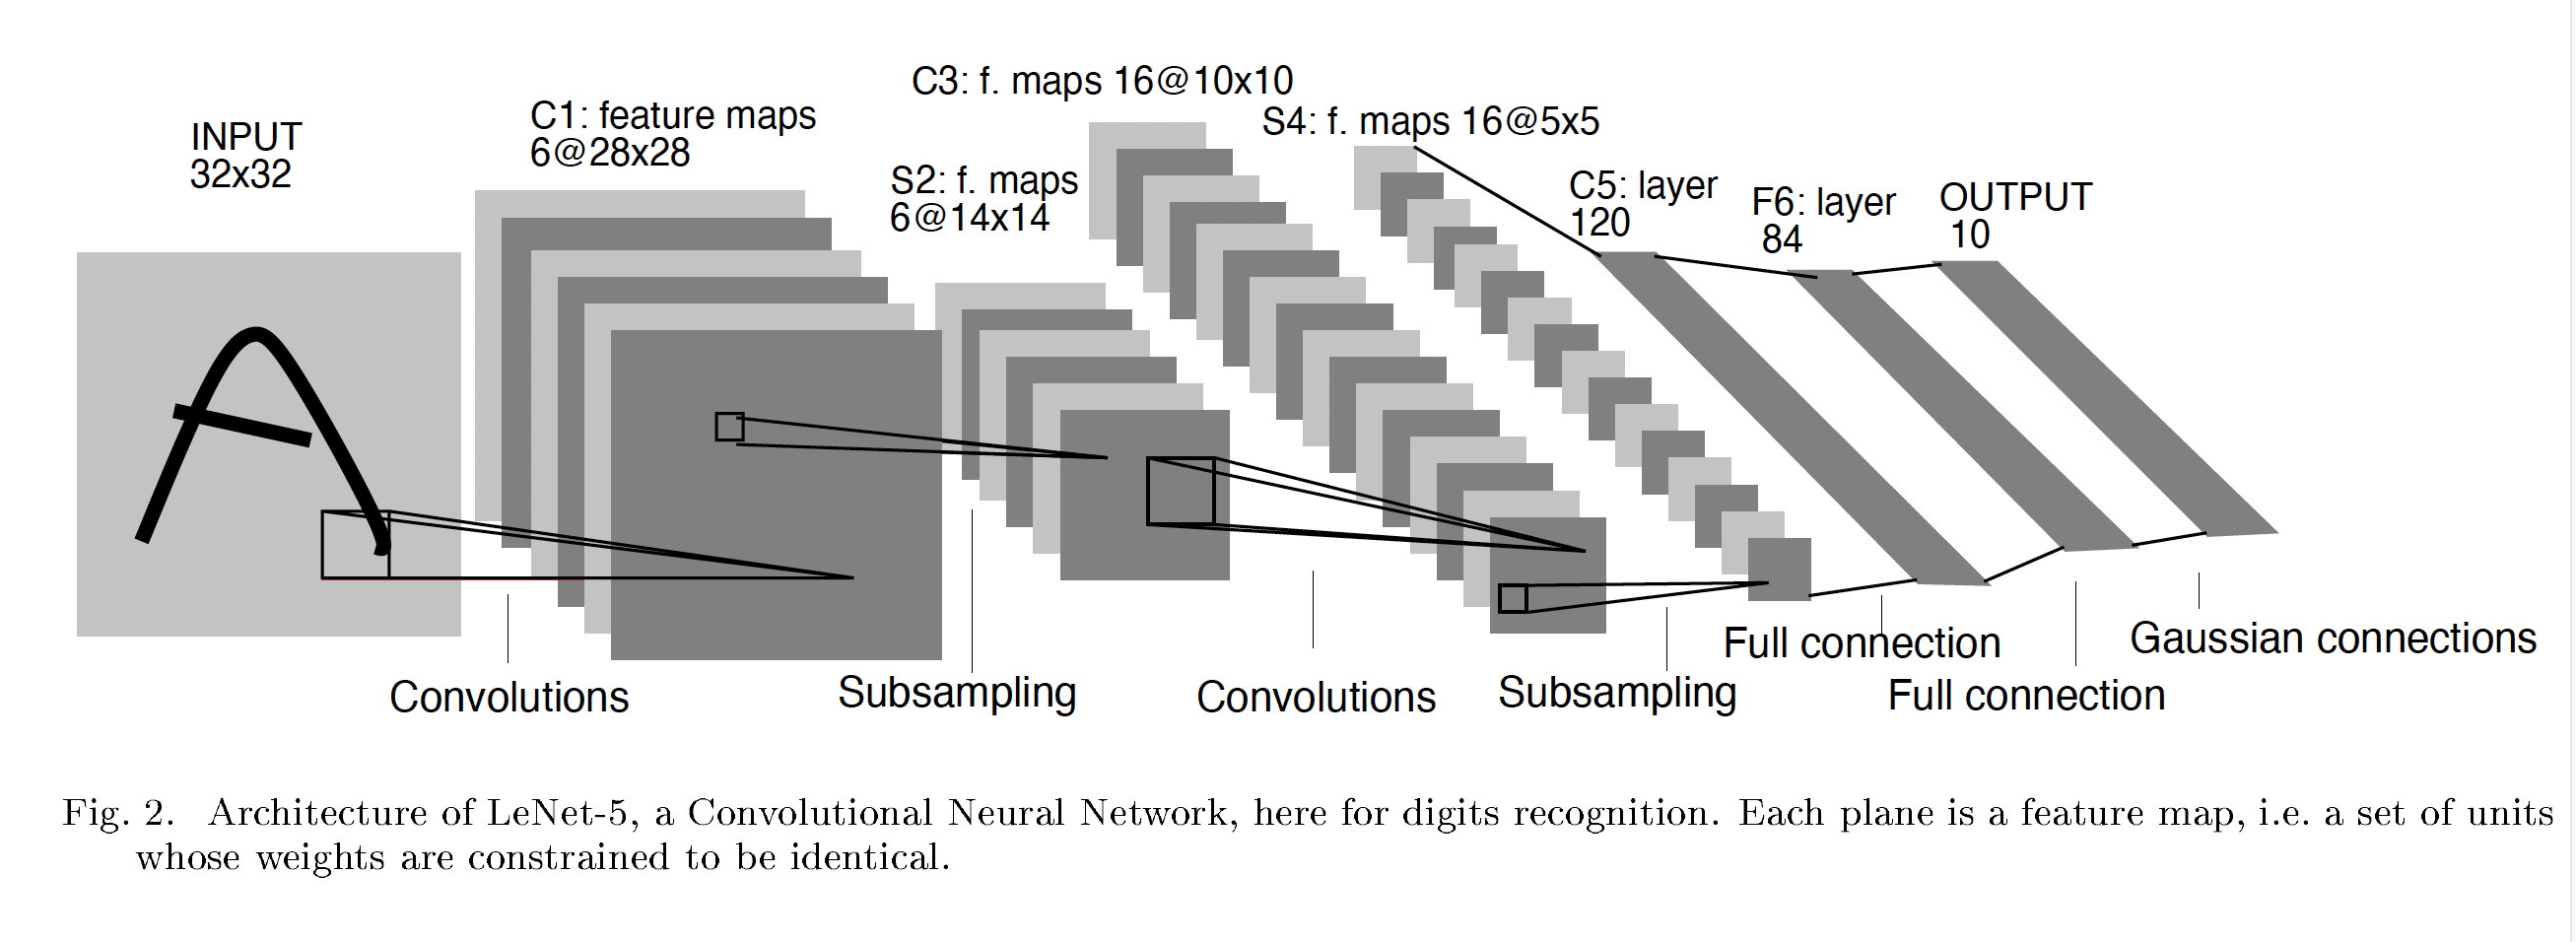

# Training LeNet5 on MNIST data 

In [3]:
# network architecture 
LeNet = Sequential()

LeNet.add(layers.Conv2D(6,kernel_size=(5,5),strides=(1,1),activation='relu', input_shape = (28,28,1), padding = 'same'))
LeNet.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2),padding='valid'))
LeNet.add(layers.Conv2D(16,kernel_size=(5,5),strides=(1,1),activation='tanh', padding = 'valid'))
LeNet.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2),padding='valid'))
LeNet.add(layers.Flatten())
LeNet.add(layers.Dense(120, activation='relu'))
LeNet.add(layers.Dense(84, activation='relu'))
LeNet.add(layers.Dense(10, activation='softmax'))

In [4]:
LeNet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

In [5]:
LeNet.compile(loss=keras.metrics.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
history = LeNet.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 12s 5ms/step - loss: 0.3375 - accuracy: 0.9002 - val_loss: 0.1012 - val_accuracy: 0.9678
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0920 - accuracy: 0.9721 - val_loss: 0.0626 - val_accuracy: 0.9809
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0642 - accuracy: 0.9801 - val_loss: 0.0580 - val_accuracy: 0.9808
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0509 - accuracy: 0.9847 - val_loss: 0.0422 - val_accuracy: 0.9870
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0446 - accuracy: 0.9855 - val_loss: 0.0421 - val_accuracy: 0.9871
Epoch 6/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0395 - accuracy: 0.9871 - val_loss: 0.0367 - val_accuracy: 0.9875
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0343 - accuracy: 0.9888 - val_loss: 0.0382 - val_accuracy: 0.9876
Epoch

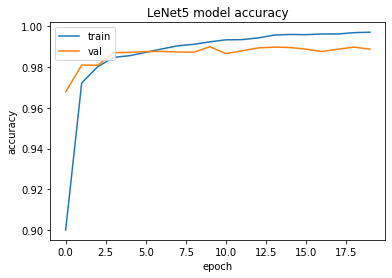

In [6]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('LeNet5 model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

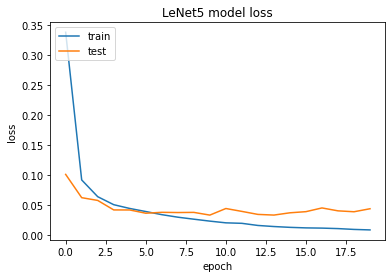

In [7]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('LeNet5 model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()